# Plotting
## The following file comprises the plots for the various test that we run

In [168]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [169]:
#which computer is it run on? If you wish to run the following code on new machine please specify the right paths below
katarzyna = False

In [170]:

if katarzyna:
    sys.path.append("/home/katarzyna/Documents/school/applied_algo/exam/fresh_copy/TheMatrix")
    path = "/home/katarzyna/Documents/school/applied_algo/exam/fresh_copy/TheMatrix/"
else:
    sys.path.append("/home/gustavgyrst/Desktop/AA_Final/TheMatrix")
    path = "/home/gustavgyrst/Desktop/AA_Final/TheMatrix/"


### Path for saving all plots

In [171]:
plot_path = "experiments/Results/plots/"

### Define m_list for Strassen's and recursive write through

In [172]:
m_list = [0,2,4,8,16,32,64,128,256]
m_legend = ["m="+str(m) for m in m_list]

In [173]:
n_ticks = [32,64,128,256,512]
n_label = [str(tick) for tick in n_ticks]


## Recursive Write Through m-tests Plotting

### Paths and Dataframe creation 

In [174]:
#insert the relative path
relative_path = "experiments/Results/write_through_m_experiments/"


In [175]:
name = "_recursive_write_through_matrix_multiplication_mtest.csv"

recursive_write_through_res = {}

for i in range(len(m_list)):
    df_name = "df_m"+str(m_list[i])
    df = pd.read_csv(path + relative_path + str(m_list[i]) + name)
    df = df[df.index > 1]
    df['nano_seconds/runtime'] = df.apply(lambda x: (1000000000*x['time']) / x['n']**3, axis=1)
    
    recursive_write_through_res[df_name] = df

### Plotting

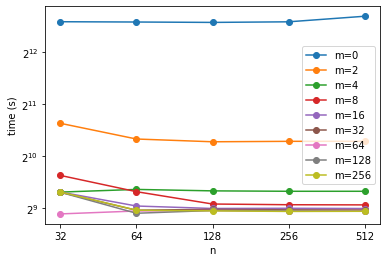

In [176]:

fig = plt.figure()
ax = fig.gca()

for m in m_list:
    name = "df_m" + str(m)
    df = recursive_write_through_res[name]
    ax.errorbar(df['n'], df['nano_seconds/runtime'], capsize = 3.0, marker = 'o')

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
plt.xticks(n_ticks, n_label)

#outside for-loop
ax.set_xlabel("n")
ax.set_ylabel("time (s)")
ax.legend(m_legend)

#save plot as pdf
plt.savefig(path+plot_path+ "recursive_write_through_m_experiment_res.pdf")


## Strassen's m-tests Plotting

### Paths and Dataframe creation 

In [177]:
#insert the relative path
relative_path = "experiments/Results/strassen_m_experiments/"

In [178]:
name = "_strassen_matrix_multiplication_mtest.csv"

strassens_res = {}

for i in range(len(m_list)):
    df_name = "df_m"+str(m_list[i])
    df = pd.read_csv(path + relative_path + str(m_list[i]) + name)
    df = df[df.index > 1]
    df['nano_seconds/runtime'] = df.apply(lambda x: (1000000000*x['time']) / x['n']**2.8, axis=1)
    
    strassens_res[df_name] = df

### Plotting

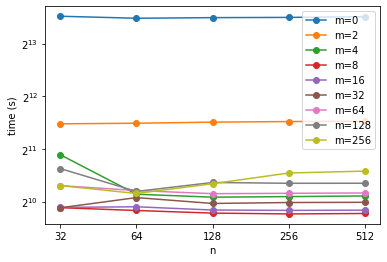

In [179]:

fig = plt.figure()
ax = fig.gca()

for m in m_list:
    name = "df_m" + str(m)
    df = strassens_res[name]
    ax.errorbar(df['n'], df['nano_seconds/runtime'], capsize = 3.0, marker = 'o')

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
plt.xticks(n_ticks, n_label)


#outside for-loop
ax.set_xlabel("n")
ax.set_ylabel("time (s)")
ax.legend(m_legend)

#save plot as pdf
plt.savefig(path+plot_path+ "strassen_m_experiment_res.pdf")